# People Analytics — Employee Survey

## Import dan Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression


pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATA SET/assignment_employee_survey.csv')
df.head()

,emp_id,gender,age,marital_status,job_level,experience,dept,emp_type,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_mode,commute_distance,num_companies,team_size,num_reports,edu_level,have_ot,training_hours_per_year,job_satisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.5,2,1,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.8,2,2,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.1,5,4,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.9,3,1,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,45,Female,33,Married,Mid,10,Operations,Part-Time,2,3,1.4,4,2,6.2,Car,8,3,13,0,Bachelor,False,35.0,5


## EDA

**emp_id** → ID unik tiap karyawan

**gender** → Jenis kelamin karyawan (Male / Female).

**age** → Usia karyawan.

**marital_status** → Status pernikahan (Single, Married, dll.).

**job_level** → Level pekerjaan (misal Junior, Mid, Senior / angka 1–5).

**experience** → Lama pengalaman kerja (tahun).

**dept** → Departemen tempat bekerja (HR, IT, Finance, Sales, dll.).

**emp_type** → Jenis pegawai (Contract, Permanent, Intern, dll.).

**wlb** → Work-life balance rating (biasanya skala 1–5).

**work_env** → Kepuasan terhadap lingkungan kerja (skala rating).

**physical_activity_hours** → Jam aktivitas fisik per minggu.

**workload** → Beban kerja (skala rating, bisa 1–5).

**stress** → Tingkat stres (skala rating, bisa 1–5).

**sleep_hours** → Rata-rata jam tidur per hari.

**commute_mode** → Cara bepergian ke kantor (Car, Bus, Walk, Bike, dll.).

**commute_distance** → Jarak perjalanan ke kantor (km).

**num_companies** → Jumlah perusahaan tempat bekerja sebelumnya.

**team_size** → Ukuran tim tempat dia bekerja.

**num_reports** → Jumlah bawahan langsung.

**edu_level** → Tingkat pendidikan (High School, Bachelor, Master, PhD).

**have_ot** → Apakah sering lembur (Yes/No).

**training_hours_per_year** → Jam pelatihan dalam setahun.

**job_satisfaction** → tingkat kepuasan kerja (skala rating 1–5).

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   int64  
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

In [5]:
print('\nMissing values per column:')
print(df.isna().sum())


Missing values per column:
emp_id                     0
gender                     0
age                        0
marital_status             0
job_level                  0
experience                 0
dept                       0
emp_type                   0
wlb                        0
work_env                   0
physical_activity_hours    0
workload                   0
stress                     0
sleep_hours                0
commute_mode               0
commute_distance           0
num_companies              0
team_size                  0
num_reports                0
edu_level                  0
have_ot                    0
training_hours_per_year    0
job_satisfaction           0
dtype: int64


In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
emp_id,2766.0,1516.601952,873.996466,1.0,764.5,1515.5,2271.75,3025.0
age,2766.0,35.650759,10.175719,22.0,27.0,34.0,43.00,60.0
experience,2766.0,8.989154,7.003013,0.0,3.0,8.0,14.00,29.0
wlb,2766.0,3.049530,1.448103,1.0,2.0,3.0,4.00,5.0
work_env,2766.0,3.028923,1.417494,1.0,2.0,3.0,4.00,5.0
physical_activity_hours,2766.0,2.038250,0.966535,0.0,1.4,2.1,2.70,5.0
workload,2766.0,2.979031,1.405335,1.0,2.0,3.0,4.00,5.0
stress,2766.0,1.737166,1.065303,1.0,1.0,1.0,2.00,5.0
sleep_hours,2766.0,7.008351,1.003736,4.0,6.3,7.0,7.70,10.0
commute_distance,2766.0,13.419740,8.344388,1.0,6.0,13.0,20.00,29.0


In [7]:
# Relevan Column
relevant_numeric = ['age','experience','physical_activity_hours','workload','stress','sleep_hours','commute_distance','num_companies','team_size','num_reports','training_hours_per_year']
relevant_categorical = ['gender','marital_status','job_level','dept','emp_type','wlb','work_env','commute_mode','edu_level','have_ot']

print('Numeric :', [c for c in relevant_numeric if c in df.columns])
print('Categorical :', [c for c in relevant_categorical if c in df.columns])

Numeric : ['age', 'experience', 'physical_activity_hours', 'workload', 'stress', 'sleep_hours', 'commute_distance', 'num_companies', 'team_size', 'num_reports', 'training_hours_per_year']
Categorical : ['gender', 'marital_status', 'job_level', 'dept', 'emp_type', 'wlb', 'work_env', 'commute_mode', 'edu_level', 'have_ot']


## Data Cleaning

In [8]:
df_clean = df.copy()

In [9]:
if 'have_ot' in df_clean.columns:
    df_clean['have_ot'] = df_clean['have_ot'].astype(bool)

In [10]:
num_cols = df_clean.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df_clean.select_dtypes(include=['object','bool']).columns.tolist()


In [11]:
for c in num_cols:
    if df_clean[c].isna().sum() > 0:
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())


In [12]:
for c in cat_cols:
    if df_clean[c].isna().sum() > 0:
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc[0])


In [13]:
print('Missing values after simple imputation total:', df_clean.isna().sum().sum())
df_clean.shape

Missing values after simple imputation total: 0


(2766, 23)

## Distribution of Job_satisfaction

In [14]:
job_satisfaction_summary = df_clean['job_satisfaction'].value_counts().to_frame().reset_index()
job_satisfaction_summary.columns = ['Job Satisfaction', 'Count']
job_satisfaction_summary

,Job Satisfaction,Count
0,4,1127
1,3,519
2,5,478
3,1,388
4,2,254


Rating terbanyak dari survey job satisfaction adalah **rating 4**

/tmp/ipython-input-1808648165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_satisfaction', data=df_clean, palette='viridis')


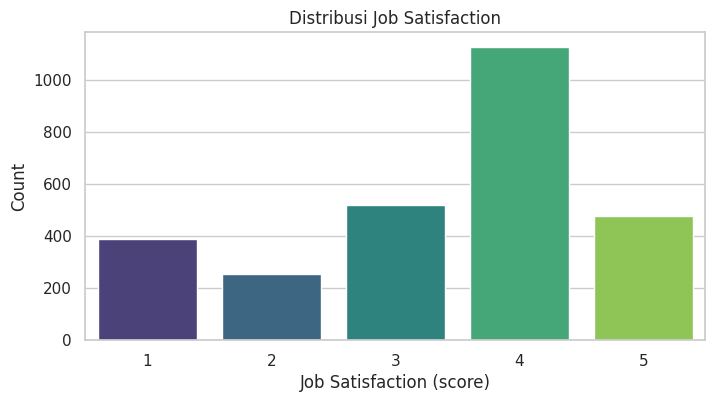

count    2766.000000
mean        3.380694
std         1.267785
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: job_satisfaction, dtype: float64

Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x='job_satisfaction', data=df_clean, palette='viridis')
plt.title('Distribusi Job Satisfaction')
plt.xlabel('Job Satisfaction (score)')
plt.ylabel('Count')
plt.show()

print(df_clean['job_satisfaction'].describe())
print('\nUnique values:', sorted(df_clean['job_satisfaction'].unique()))

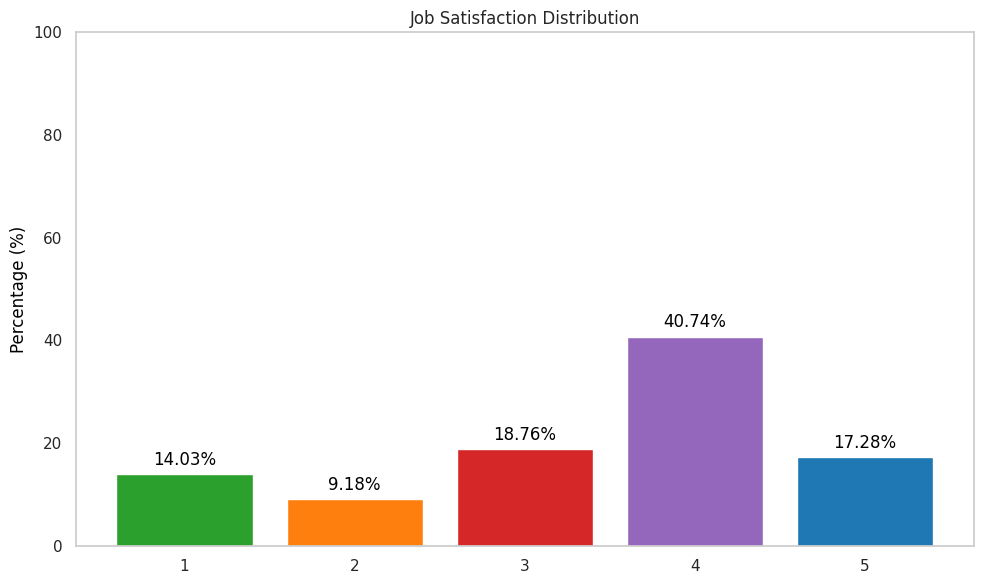

In [16]:
# Hitung distribusi job satisfaction
job_sat = (
    df_clean['job_satisfaction']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
)
job_sat.columns = ['job_satisfaction', 'Percentage']
job_sat = job_sat.sort_values('job_satisfaction')  # urutkan rating 1–5

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = ['#2ca02c', '#ff7f0e', '#d62728', '#9467bd', '#1f77b4']

bars = ax1.bar(job_sat['job_satisfaction'],
               job_sat['Percentage'],
               color=color[:len(job_sat)])

ax1.set_ylabel('Percentage (%)', color='black')
ax1.set_ylim(0, 100)
ax1.grid(False)
plt.xticks(rotation=0, ha='center')

# Tambahkan label di atas bar
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2,
             height + 1,
             f"{height:.2f}%",
             ha='center', va='bottom', color='black')

plt.title('Job Satisfaction Distribution')
plt.tight_layout()
plt.show()


In [17]:
satisfaction = (
    df_clean
    .groupby(['dept', 'job_satisfaction'])[['job_satisfaction']]
    .count()
    .rename(columns={'job_satisfaction': 'Count'})   # biar lebih jelas
    .sort_values(by='Count', ascending=False)        # urutkan dari terbesar
    .reset_index()
)

satisfaction


,dept,job_satisfaction,Count
0,IT,4,276
1,Finance,4,218
2,Operations,4,176
3,IT,3,144
4,IT,1,125
5,Marketing,4,121
6,IT,5,120
7,Legal,4,117
8,Finance,5,111
9,Finance,3,107


* Departement yang **paling banyak memberikan rating** adalah **department IT** sebanyak **276 orang** dengan memberikan rating 4
* Departement **Finance** sebanyak **218 orang** memberikan rating 4
* Departement ke 3 adalah **Operations** sebanyak **176 orang** memberikan rating 4

In [18]:
# Hitung jumlah per dept dan rating
satisfaction = (
    df_clean
    .groupby(['dept', 'job_satisfaction'])
    .size()
    .reset_index(name='Count')
)

# Ambil dept dengan jumlah terbanyak per rating
top_dept_per_rating = (
    satisfaction
    .sort_values(['job_satisfaction', 'Count'], ascending=[True, False])
    .groupby('job_satisfaction')
    .first()
    .reset_index()
)

top_dept_per_rating


,job_satisfaction,dept,Count
0,1,IT,125
1,2,IT,58
2,3,IT,144
3,4,IT,276
4,5,IT,120


* Rating 1 - 5 terbanyak adalah dari departemen **IT**

## Cek Korelasi variable numerik

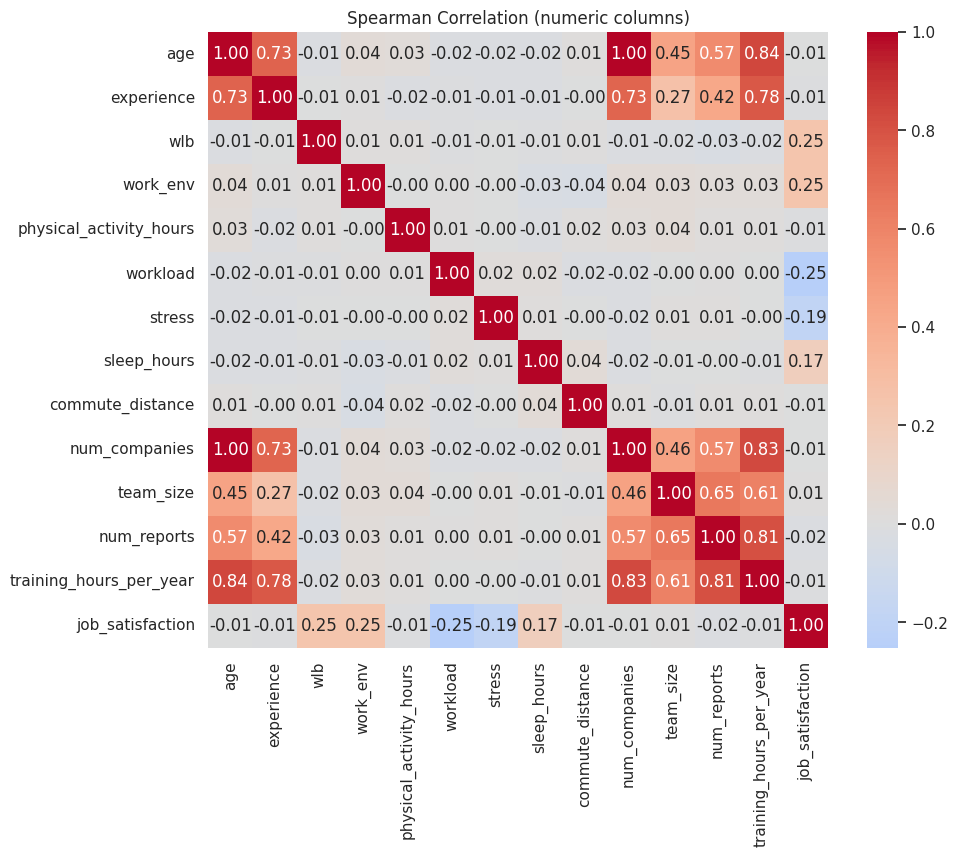

,job_satisfaction
job_satisfaction,1.000000
wlb,0.246660
work_env,0.245846
sleep_hours,0.168610
team_size,0.005026
commute_distance,-0.005065
num_companies,-0.005127
age,-0.006555
training_hours_per_year,-0.008632
experience,-0.009947


In [19]:
numeric_cols = [c for c in df_clean.columns if df_clean[c].dtype in ['int64','float64'] and c != 'emp_id']
plt.figure(figsize=(10,8))
corr = df_clean[numeric_cols].corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Spearman Correlation (numeric columns)')
plt.show()

job_corr = corr['job_satisfaction'].sort_values(ascending=False)
job_corr

**Korelasi yang berhubungan dengan Job satisfaction**

* **Job satisfaction vs  WLB (0.25) &  Work_env (0.25)**
Artinya, kepuasan kerja agak dipengaruhi oleh work-life balance dan lingkungan kerja, meskipun korelasi tidak terlalu tinggi.

* **Job satisfaction vs Workload (-0.25)**
Beban kerja tinggi cenderung menurunkan kepuasan kerja.

* **Job satisfaction vs Stress (-0.19)**
Stres lebih tinggi juga sedikit menurunkan kepuasan kerja.

* Kesimpulan hipotesis awal tentang
Kepuasan kerja paling dipengaruhi oleh faktor **workload (negatif)**, **stress (negatif), work-life balance (positif), dan lingkungan kerja (positif).**

/tmp/ipython-input-1420404897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job_satisfaction', y='workload', data=df_clean, palette='Set2')
/tmp/ipython-input-1420404897.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job_satisfaction', y='stress', data=df_clean, palette='Set3')


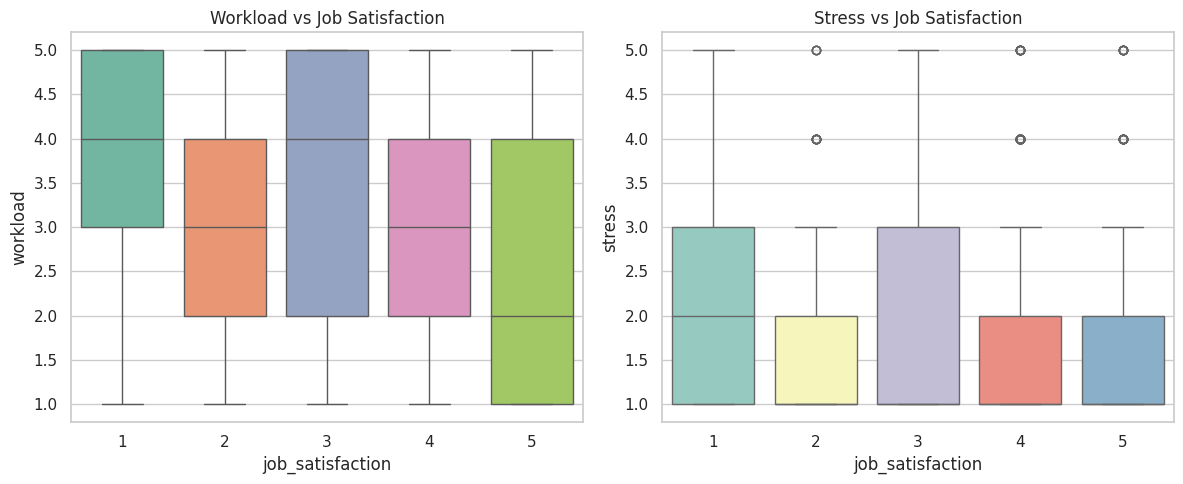

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='job_satisfaction', y='workload', data=df_clean, palette='Set2')
plt.title('Workload vs Job Satisfaction')

plt.subplot(1,2,2)
sns.boxplot(x='job_satisfaction', y='stress', data=df_clean, palette='Set3')
plt.title('Stress vs Job Satisfaction')
plt.tight_layout()
plt.show()

**1. Workload vs Job Satisfaction**
* Job satisfaction rendah (1–2) → median workload lebih tinggi (sekitar 3–4).

* Job satisfaction tinggi (4–5) → median workload lebih rendah (sekitar 2).

Terlihat tren **semakin puas** terhadap pekerjaan, **semakin rendah beban kerja** yang dirasakan.

Variasi workload cukup besar di semua tingkat kepuasan, tapi ada pola penurunan rata-rata beban kerja pada job satisfaction yang lebih tinggi.

**Workload yang tinggi cenderung menurunkan kepuasan kerja.**

**2. Stress vs Job Vacation**
* Job satisfaction rendah (1–2) → median stress lebih tinggi (2–3).

* Job satisfaction tinggi (4–5) → median stress lebih rendah (sekitar 1–2).

Ada beberapa outlier stress tinggi (4–5) di semua level job satisfaction, artinya walau mayoritas dengan kepuasan tinggi punya stress rendah, tetap ada individu yang stres meski puas dengan pekerjaannya.

**Semakin rendah stres, cenderung semakin tinggi kepuasan kerja.**

/tmp/ipython-input-1885784210.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')
/tmp/ipython-input-1885784210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')


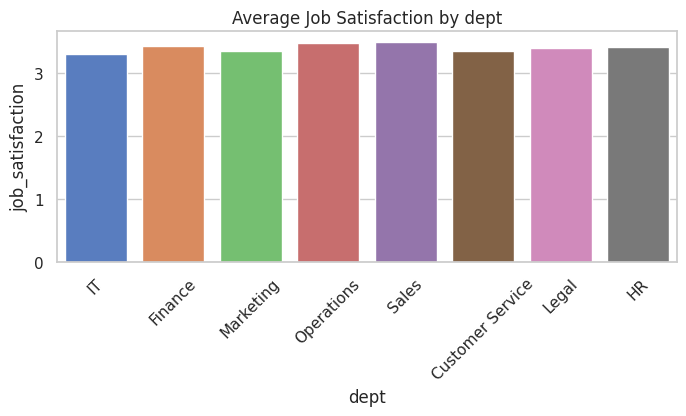

/tmp/ipython-input-1885784210.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')
/tmp/ipython-input-1885784210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')


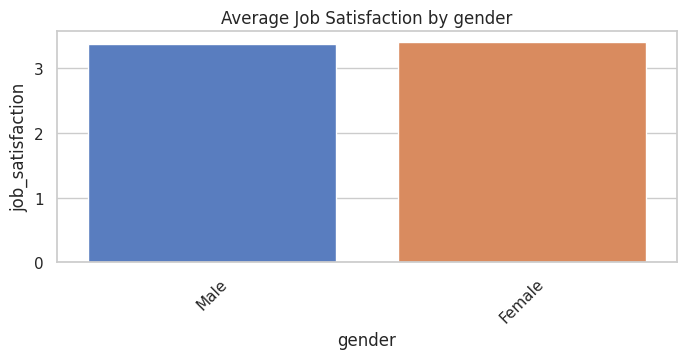

/tmp/ipython-input-1885784210.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')
/tmp/ipython-input-1885784210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')


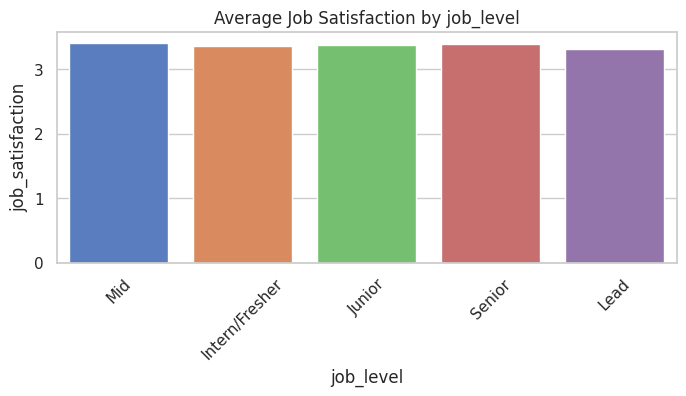

/tmp/ipython-input-1885784210.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')
/tmp/ipython-input-1885784210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')


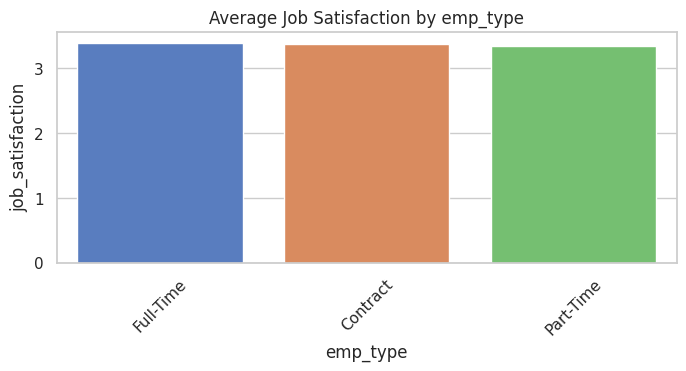

/tmp/ipython-input-1885784210.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')
/tmp/ipython-input-1885784210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')


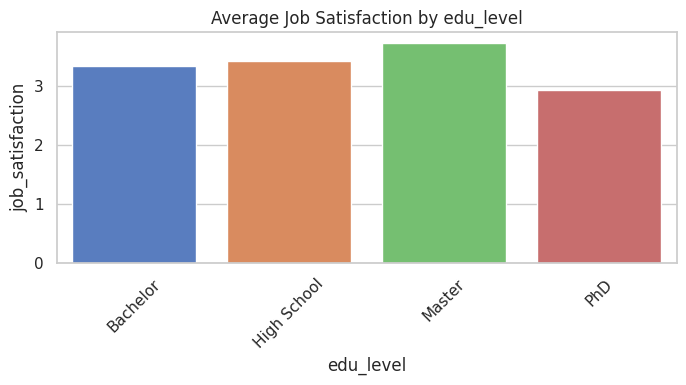

/tmp/ipython-input-1885784210.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')
/tmp/ipython-input-1885784210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')


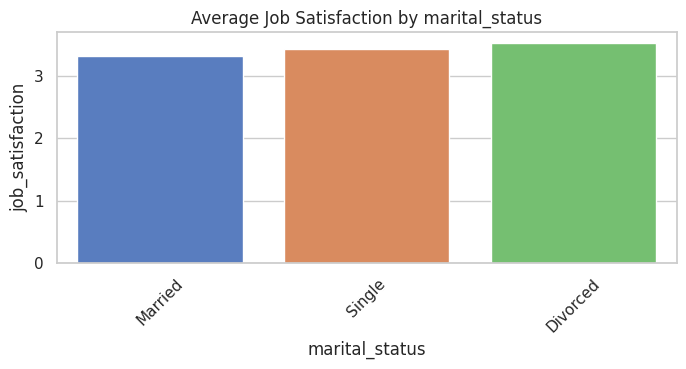

In [21]:
cat_list = ['dept','gender','job_level','emp_type','edu_level','marital_status']
for c in cat_list:
    if c in df_clean.columns:
        plt.figure(figsize=(8,3))
        sns.barplot(x=c, y='job_satisfaction', data=df_clean, ci=None, palette='muted')
        plt.title(f'Average Job Satisfaction by {c}')
        plt.xticks(rotation=45)
        plt.show()

* Rata-rata **job satisfaction** di **semua departemen relatif seragam**, sekitar 3.3 – 3.6 (skala 1–5). Tidak ada perbedaan ekstrem antar departemen yang berarti kepuasan kerja cukup merata di organisasi.
* dari kolom **gender** juga hampir tidak ada perbedaan antara pegawai laki-laki ataupun perempuan sama-sama rating 3
* dari kolom **job level, tipe pegawai, dan status pernikahan** relatif **seragam **diatas **rating 3** dan tidak ada perbedaan extrim dari kolom tersebut.
* kolom **edu_level** kategori **Master** memiliki **job satisfaction tertingg**i (sekitar 3.7–3.8). namun **PhD** justru memiliki **kepuasan kerja terendah** (sekitar 2.9). Bisa disebabkan oleh mismatch antara ekspektasi yang tinggi dengan realita pekerjaan

In [22]:
from google.colab import files

# export ke Excel
df_clean.to_excel("people_analytic.xlsx", index=False)



In [ ]:
# download ke lokal
files.download("people_analytic.xlsx")